Has the network latency gone up since we switched internet service providers?

$H_{0}$  -there is no difference between the internet service providers(or actually gone down)
$H_{1}$-there is a network latency increase since "we" swithced companies
 - true positive = i determine that latency has increased and it has
 - true negative = I determined that latency has stayed the same or decreased
 
$H_{0}$ -the internet seems to be working at the same speed

$H_{1}$ -clutter on the computer can also cause it to be slow

Type 1: Accept $H_{0}$ = rejecting that latency increased when it decreased

Type 2: Reject $H_{0}$ = accepting latency has decreased when it  increased

 
 

Is the website redesign any good?

$H_{0}$ -there is no difference between the previous and the current design 

$H_{1}$-there is a difference and the new one is better 

 - true positive - i determine that the traffic has increased and it has 
 - true negative - i determine that the traffic has decreased or stayed the same 
$H_{0}$ -the design seems to be just as good as the other one 

$H_{1}$ -the new design seems to have more internet traffic

Type 1: Accepting $H_{0}$ = rejecting that its the design that is bringing more traffic when it actually decreased

Type 2: Rejeting $H_{0}$ = accepting that that the design is bringing in more traffic when when it actually isnt

Is our television ad driving more sales?

$H_{0}$ -there isn't a difference in sales

$H_{1}$ -there is an increase in sales since the new tv ad

 - true positive - i determine that sales increased since the ad
 - true negative -  i determined that sales stayed the same or decreased since the ad
 
$H_{0}$ -the sales numbers are not affected by the new ads

$H_{1}$ -the sales numbers seem to be increasing since the ad started airing

Type 1: Accepting $H_{0}$ - rejecting that there is a diffeerence(decreased) in sales 

Type 2: Rejecting $H_{0}$ -accepting that there is a increase caused by sales 

always capture all possible outcomes

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [2]:
mean1 = 45
sdev1 = 1.9
ssize1 = 1115


mean2 = 49
sdev2 = 1.9
ssize2 = 1005

In [3]:
t, p = stats.ttest_ind_from_stats(mean1,sdev1,ssize1,mean2, sdev2, ssize2)
t,p


(-48.40151153554419, 0.0)

In [4]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.dropna()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [7]:
mpg['mileage_avg']= (mpg['hwy']+ mpg['cty'])/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [8]:
f_efficiency1 = mpg[mpg.year == 1999].mileage_avg
f_efficiency2 = mpg[mpg.year == 2008].mileage_avg
#use harmonic mean in this situation


<AxesSubplot:>

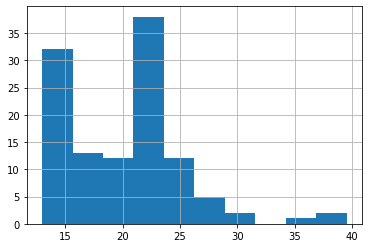

In [9]:
f_efficiency1.hist()

<AxesSubplot:>

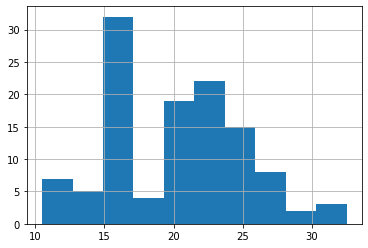

In [10]:
f_efficiency2.hist()

In [11]:
f_efficiency1.var()

27.122605363984682

In [12]:
f_efficiency2.var()

24.097480106100797

In [13]:
μth = mpg.mileage_avg.mean()
μth

20.14957264957265

In [14]:
α = 0.05

In [15]:
f_efficiency1.mean()

20.22222222222222

In [16]:
f_efficiency2.mean()

20.076923076923077

In [50]:
t, p = stats.ttest_ind(f_efficiency1,f_efficiency2 )
t, p

(0.21960177245940962, 0.8263744040323578)

In [18]:
if (pval < α) and (tstat > 0):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')
# churned customers overwhelmingly pay more

We fail to reject the null hypothesis


In [19]:
tstat2, pval2 = stats.ttest_1samp(f_efficiency2,μth)
tstat2, pval2

(-0.16008114413515914, 0.8730955773402931)

In [20]:
if (pval2 < α) and (tstat > 0):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')
# churned customers overwhelmingly pay more

We fail to reject the null hypothesis


are compact cars more fuel efficient than the average 


In [21]:
mpg['class']= mpg["class"].astype(str)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [22]:
mpg.rename(columns= {"class": "cartype"}, inplace = True)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,cartype,mileage_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [52]:
f_eff = mpg[mpg.cartype == "compact"].mileage_avg
#  could have used ["class"]
f_eff.mean()

24.21276595744681

In [41]:
tstat3, pval3 = stats.ttest_1samp(f_eff, μth)
tstat3, pval3

(7.896888573132535, 4.1985637943171336e-10)

In [31]:
if (pval3 / 2 < α) and (tstat > 0):
    print("We reject the null hypothesis!")
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis!


In [39]:
compact_c = mpg[mpg.cartype == 'compact'].mileage_avg
non_compact_c = mpg[mpg.cartype != 'compact'].mileage_avg


<AxesSubplot:>

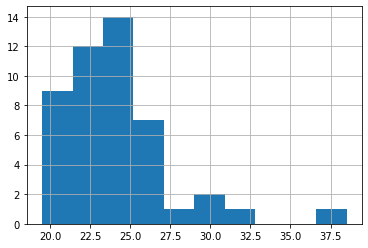

In [48]:
compact_c.hist()

<AxesSubplot:>

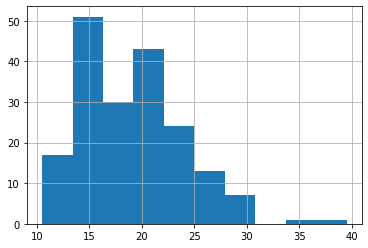

In [49]:
non_compact_c.hist()

In [40]:
tstat3, pval3 = stats.levene(compact_c, non_compact_c)
if pval < 0.05:
    print('We can reject the H0 that the two samples have equal variance')
#    levene checks if the variances are similar

In [44]:
alpha = 0.05

In [45]:
t, p = stats.ttest_ind(compact_c, non_compact_c, equal_var= False) #we check if var = false or true
# t, p = t-test: (group A, group B) ==> comparison of mu_a > mu_b
t, p/2, alpha

(8.128810422808078, 8.009030328061537e-13, 0.05)

In [46]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [47]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [ ]:
Do manual cars get better gas mileage than automatic cars?
